In [45]:
from keras.datasets import fashion_mnist
fashion_mnist_data = fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


In [46]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

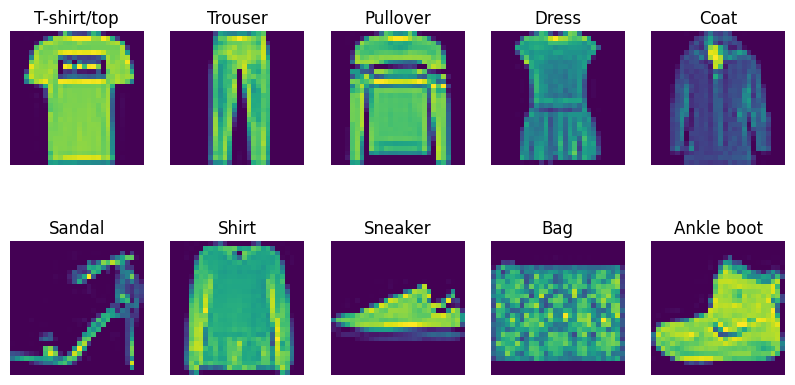

In [47]:
class_id,images_index_each_class = np.unique(train_labels, return_index=True)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[images_index_each_class[i]])
    plt.title(class_names[class_id[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Layer class
class Layer:
    def __init__(self, input_size, output_size, activation):
        self.weights = np.random.randn(input_size, output_size) * np.sqrt(2/input_size)
        self.biases = np.zeros((1, output_size))
        self.activation_name = activation
    
    def activate(self, x):
        if self.activation_name == 'relu':
            return np.maximum(0, x)
        elif self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation_name == 'softmax':
            exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
            return exp_x / np.sum(exp_x, axis=1, keepdims=True)
        else:
            raise ValueError("Unsupported activation function")
    
    def activation_derivative(self, x):
        if self.activation_name == 'relu':
            return (x > 0).astype(float)
        elif self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-x)) * (1 - 1 / (1 + np.exp(-x)))
        else:
            raise ValueError("Unsupported activation function")        

# Neural Network class
class FeedForwardNN:
    def __init__(self, input_size, hidden_layers, output_size, lr):
        self.lr = lr
        self.layers = []
        layer_sizes = [input_size] + [layer[0] for layer in hidden_layers] + [output_size]
        activations = [layer[1] for layer in hidden_layers] + ['softmax']
        
        for i in range(len(layer_sizes) - 1):
            self.layers.append(Layer(layer_sizes[i], layer_sizes[i + 1], activations[i]))
    
    def forward(self, X):
        self.a = [X]
        self.z = []
        
        for layer in self.layers:
            self.z.append(np.dot(self.a[-1], layer.weights) + layer.biases)
            self.a.append(layer.activate(self.z[-1]))
        
        return self.a[-1]
    
    def backward(self, X, y):
        m = X.shape[0]
        y_one_hot = np.eye(self.layers[-1].biases.shape[1])[y]
        dz = self.a[-1] - y_one_hot
        
        for i in range(len(self.layers) - 1, -1, -1):
            layer = self.layers[i]
            dw = np.dot(self.a[i].T, dz) / m
            db = np.sum(dz, axis=0, keepdims=True) / m
            
            layer.weights -= self.lr * dw
            layer.biases -= self.lr * db
            
            if i > 0:
                dz = np.dot(dz, layer.weights.T) * self.layers[i - 1].activation_derivative(self.z[i - 1])
    
    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            loss = -np.mean(np.log(self.a[-1][range(y.shape[0]), y]))
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
    
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [49]:
# Preprocess data
train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

In [56]:
# Train the model
model = FeedForwardNN(input_size=784,hidden_layers=[(256, 'relu'), (128, 'relu'), (64, 'relu')],output_size=10, lr=0.01)
model.train(train_images, train_labels, epochs=35)

# Evaluate the model
test_predictions = model.predict(test_images)
accuracy = np.mean(test_predictions == test_labels) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Epoch 1/35, Loss: 2.6376
Epoch 2/35, Loss: 2.4996
Epoch 3/35, Loss: 2.4180
Epoch 4/35, Loss: 2.3634
Epoch 5/35, Loss: 2.3216
Epoch 6/35, Loss: 2.2863
Epoch 7/35, Loss: 2.2546
Epoch 8/35, Loss: 2.2251
Epoch 9/35, Loss: 2.1977
Epoch 10/35, Loss: 2.1722
Epoch 11/35, Loss: 2.1485
Epoch 12/35, Loss: 2.1260
Epoch 13/35, Loss: 2.1047
Epoch 14/35, Loss: 2.0841
Epoch 15/35, Loss: 2.0642
Epoch 16/35, Loss: 2.0448
Epoch 17/35, Loss: 2.0259
Epoch 18/35, Loss: 2.0073
Epoch 19/35, Loss: 1.9891
Epoch 20/35, Loss: 1.9711
Epoch 21/35, Loss: 1.9535
Epoch 22/35, Loss: 1.9362
Epoch 23/35, Loss: 1.9191
Epoch 24/35, Loss: 1.9022
Epoch 25/35, Loss: 1.8855
Epoch 26/35, Loss: 1.8690
Epoch 27/35, Loss: 1.8528
Epoch 28/35, Loss: 1.8368
Epoch 29/35, Loss: 1.8210
Epoch 30/35, Loss: 1.8054
Epoch 31/35, Loss: 1.7900
Epoch 32/35, Loss: 1.7749
Epoch 33/35, Loss: 1.7599
Epoch 34/35, Loss: 1.7451
Epoch 35/35, Loss: 1.7306
Test Accuracy: 53.02%
